# JAM FITTER

In [1]:
import sys,os
from fitlab.resman import RESMAN
from fitlab.mcsamp import MCSAMP
from tools.config import load_config,conf
from tools.tools import load, save,checkdir
import pylab as py
import numpy as np
import pandas as pd
import copy
def lprint(msg):
    sys.stdout.write('\r')
    sys.stdout.write('%s' %msg)
    sys.stdout.flush()
%matplotlib inline

## setup path to store the results 

In [2]:
path2results='sidis_transversity'
checkdir(path2results)

## data sets 

In [3]:
conf['datasets']={}

## SIDIS Collins Asymmetry

In [4]:
conf['datasets']['sidis']={}
conf['datasets']['sidis']['filters']={0:{'idx':None,'filter':None}}
conf['datasets']['sidis']['filters'][0]['idx']=[4001,4000,4002,4004,4003,4005,3027,3025,3010]
conf['datasets']['sidis']['filters'][0]['idx'].extend([3012,3005,3013,3026,3000,3003,3016,3004,3018])
conf['datasets']['sidis']['filters'][0]['filter']="z<0.6 and Q2>1.69 and pT>0.2 and pT<0.9"
conf['datasets']['sidis']['xlsx']={}
conf["datasets"]["sidis"]["xlsx"][4001]="sidis/expdata/4001.xlsx"  #  compass  deuteron  pi+   pT
conf["datasets"]["sidis"]["xlsx"][4000]="sidis/expdata/4000.xlsx"  #  compass  deuteron  pi+    x
conf["datasets"]["sidis"]["xlsx"][4002]="sidis/expdata/4002.xlsx"  #  compass  deuteron  pi+    z
conf["datasets"]["sidis"]["xlsx"][4004]="sidis/expdata/4004.xlsx"  #  compass  deuteron  pi-   pT
conf["datasets"]["sidis"]["xlsx"][4003]="sidis/expdata/4003.xlsx"  #  compass  deuteron  pi-    x
conf["datasets"]["sidis"]["xlsx"][4005]="sidis/expdata/4005.xlsx"  #  compass  deuteron  pi-    z
conf["datasets"]["sidis"]["xlsx"][3027]="sidis/expdata/3027.xlsx"  #  compass    proton  pi+   pt
conf["datasets"]["sidis"]["xlsx"][3025]="sidis/expdata/3025.xlsx"  #  compass    proton  pi+    x
conf["datasets"]["sidis"]["xlsx"][3010]="sidis/expdata/3010.xlsx"  #  compass    proton  pi+    z
conf["datasets"]["sidis"]["xlsx"][3012]="sidis/expdata/3012.xlsx"  #  compass    proton  pi-   pt
conf["datasets"]["sidis"]["xlsx"][3005]="sidis/expdata/3005.xlsx"  #  compass    proton  pi-    x
conf["datasets"]["sidis"]["xlsx"][3013]="sidis/expdata/3013.xlsx"  #  compass    proton  pi-    z
conf["datasets"]["sidis"]["xlsx"][3026]="sidis/expdata/3026.xlsx"  #   HERMES    proton  pi+   pt
conf["datasets"]["sidis"]["xlsx"][3000]="sidis/expdata/3000.xlsx"  #   HERMES    proton  pi+    x
conf["datasets"]["sidis"]["xlsx"][3003]="sidis/expdata/3003.xlsx"  #   HERMES    proton  pi+    z
conf["datasets"]["sidis"]["xlsx"][3016]="sidis/expdata/3016.xlsx"  #   HERMES    proton  pi-   pt
conf["datasets"]["sidis"]["xlsx"][3004]="sidis/expdata/3004.xlsx"  #   HERMES    proton  pi-    x
conf["datasets"]["sidis"]["xlsx"][3018]="sidis/expdata/3018.xlsx"  #   HERMES    proton  pi-    z
conf['datasets']['sidis']['norm']={}
for k in conf['datasets']['sidis']['xlsx']: 
    conf['datasets']['sidis']['norm'][k]={'value':1,'fixed':True,'min':0,'max':1} 

## parameters

In [5]:
conf['params']={}
conf['shape']=1

### TMD PDF/FF parameters (from upol analysis)

In [6]:
conf['params']={}
conf['params']['pdf']={}
conf['params']['pdf']['widths0 valence']  = {'value':5.89294556274006398056e-01,'fixed':True,'min':0,'max':1}
conf['params']['pdf']['widths0 sea']      = {'value':6.33443286558464269120e-01,'fixed':True,'min':0,'max':1}
conf['params']['ff']={}
conf['params']['ff']['widths0 pi+ fav']   = {'value':1.15920500644793311729e-01,'fixed':True,'min':0,'max':1}
conf['params']['ff']['widths0 pi+ unfav'] = {'value':1.39782079427820671302e-01,'fixed':True,'min':0,'max':1}

### TMD Transversity parameters

In [7]:
conf['params']['transversity']={}
conf['params']['transversity']['widths0 valence'] = {'value':0.5,'fixed':False,'min':1e-5,'max':2}
conf['params']['transversity']['widths0 sea']     = {'value':0.5,'fixed':False,'min':1e-5,'max':2}
conf['params']['transversity']['u N']  = {'value':1,'fixed':False,'min':-10,'max':10}
conf['params']['transversity']['u a']  = {'value':-0.5,'fixed':False,'min':-1 ,'max':10}
conf['params']['transversity']['u b']  = {'value': 3.0,'fixed':False,'min': 1,'max':10}
conf['params']['transversity']['d N']  = {'value': 1.0,'fixed':False,'min':-20,'max':20}
conf['params']['transversity']['d a']  = {'value':-0.5,'fixed':False,'min':-1,'max':5}
conf['params']['transversity']['d b']  = {'value': 3.0,'fixed':False,'min':1e-5,'max':20}
conf['params']['transversity']['s N']  = {'value': 0.0,'fixed':True,'min':-10,'max':10}
conf['params']['transversity']['s a']  = {'value':-0.5,'fixed':True,'min':-1,'max':5}
conf['params']['transversity']['s b']  = {'value': 3.0,'fixed':True,'min':1e-5,'max':10}
conf['params']['transversity']['u c']  = {'value': 0.0,'fixed':True,'min':-10,'max':10}
conf['params']['transversity']['d c']  = {'value': 0.0,'fixed':True,'min':-10,'max':10}
conf['params']['transversity']['s c']  = {'value': 0.0,'fixed':True,'min':-10,'max':10}
conf['params']['transversity']['u d']  = {'value': 0.0,'fixed':True,'min':-10,'max':10}
conf['params']['transversity']['d d']  = {'value': 0.0,'fixed':True,'min':-10,'max':10}
conf['params']['transversity']['s d']  = {'value': 0.0,'fixed':True,'min':-10,'max':10}

### TMD Collins parameters

In [8]:
conf['params']['collins']={}
conf['params']['collins']['widths0 pi+ fav']     = {'value':0.5,'fixed':False,'min':1e-5,'max':1}
conf['params']['collins']['widths0 pi+ unfav']   = {'value':0.5,'fixed':False,'min':1e-5,'max':2}
conf['params']['collins']['pi+ u N 1']  = {'value': 1.0,'fixed':False,'min':0,'max':20}
conf['params']['collins']['pi+ u a 1']  = {'value':-0.5,'fixed':False,'min':-1,'max':5}
conf['params']['collins']['pi+ u b 1']  = {'value': 3.0,'fixed':False,'min':1e-5,'max':10}
conf['params']['collins']['pi+ d N 1']  = {'value': 1.0,'fixed':False,'min':-20,'max':0}
conf['params']['collins']['pi+ d a 1']  = {'value':-0.5,'fixed':False,'min':-1,'max':5}
conf['params']['collins']['pi+ d b 1']  = {'value': 3.0,'fixed':False,'min':1e-5,'max':10}
conf['params']['collins']['pi+ u c 1']  = {'value': 0.0,'fixed':True,'min':-10,'max':10}
conf['params']['collins']['pi+ d c 1']  = {'value': 0.0,'fixed':True,'min':-10,'max':10}
conf['params']['collins']['pi+ u d 1']  = {'value': 0.0,'fixed':True,'min':-10,'max':10}
conf['params']['collins']['pi+ d d 1']  = {'value': 0.0,'fixed':True,'min':-10,'max':10}

conf['params']['collins']['pi+ u N 2']  = {'value': 0.0,'fixed':True,'min':0,'max':20}
conf['params']['collins']['pi+ u a 2']  = {'value': 0.0,'fixed':True,'min':-1,'max':5}
conf['params']['collins']['pi+ u b 2']  = {'value': 0.0,'fixed':True,'min':1e-5,'max':10}
conf['params']['collins']['pi+ d N 2']  = {'value': 0.0,'fixed':True,'min':-20,'max':0}
conf['params']['collins']['pi+ d a 2']  = {'value': 0.0,'fixed':True,'min':-1,'max':5}
conf['params']['collins']['pi+ d b 2']  = {'value': 0.0,'fixed':True,'min':1e-5,'max':10}
conf['params']['collins']['pi+ u c 2']  = {'value': 0.0,'fixed':True,'min':-10,'max':10}
conf['params']['collins']['pi+ d c 2']  = {'value': 0.0,'fixed':True,'min':-10,'max':10}
conf['params']['collins']['pi+ u d 2']  = {'value': 0.0,'fixed':True,'min':-10,'max':10}
conf['params']['collins']['pi+ d d 2']  = {'value': 0.0,'fixed':True,'min':-10,'max':10}

## Nested Sampling

### initialize fitpack libraries

In [9]:
conf['resman'] = RESMAN()
mcsamp=MCSAMP()

loading sidis data sets 3013

### start multiple NS runs
- the code will start n independent runs specified by size

In [ ]:
mcsamp.run(path2results,factor=2,size=10)

iter=12626  logz=-3.545 rel-err=6.800e-05  t-elapsed=3.428e+03  dchi2min=7.155e+00 dchi2max=7.222e+00110

### combine multiple runs into one big run

In [9]:
MC=mcsamp.get_MC_samples(path2results+'/mcdata')

runs max likelihoods
140.380935021
140.380934987
140.380934963
140.380934893
140.380940473
140.380935177
140.380935003
140.380934971
140.486067969
3310.15748287
sample  size= 7790
sample2 size= 1219


### distribution of parameters

     widths0 valence =    0.59137 +/-    0.01344
         widths0 sea =    0.62275 +/-    0.06882
     widths0 pi+ fav =    0.11506 +/-    0.00143
   widths0 pi+ unfav =    0.13697 +/-    0.00194


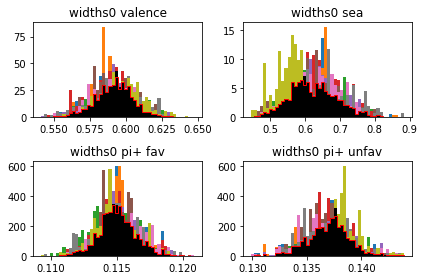

In [16]:
samples=MC['samples']
samples2=MC['samples2']
weights=MC['weights']
weights2=MC['weights2']
order=MC['order']
runs=MC['runs']

nrows,ncols=2,2
fig = py.figure(figsize=(ncols*3,nrows*2))

def get_idx(key,tag):
    for i in range(len(order)):
        if order[i][1]==key and order[i][2]==tag:
            return i

global cnt
cnt=0
def plot(tags):
    global cnt
    for i in range(1,len(tags)):
        cnt+=1
        if tags[i]==None: continue
        idx=get_idx(tags[0],tags[i])
        ax=py.subplot(nrows,ncols,cnt)
        vmin=np.amin(samples2.T[idx])
        vmax=np.amax(samples2.T[idx])
        R=(vmin,vmax)
        for k in runs:
            ax.hist(runs[k]['samples'].T[idx],weights=runs[k]['weights'],bins=50,normed=True,range=R)
        ax.hist(samples.T[idx],weights=weights,bins=50,color='k',normed=True,range=R)
        ax.hist(samples2.T[idx],weights=weights2,bins=50,color='r',histtype='step',normed=True,range=R)
        ax.set_title(tags[i])
        mean=np.einsum('i,i',samples2.T[idx],weights2)
        std=np.einsum('i,i',(samples2.T[idx]-mean)**2,weights2)**0.5
        print '%20s = %10.5f +/- %10.5f'%(tags[i],mean,std)
        #ax.set_xlim(vmin,vmax)
    py.tight_layout()

plot(['pdf','widths0 valence','widths0 sea'])
plot(['ff','widths0 pi+ fav','widths0 pi+ unfav'])


## data vs theory

In [11]:
data={'weights':MC['weights2']}
cnt=0
for s in MC['samples2']:
    cnt+=1    
    lprint('%d/%d'%(cnt,len(MC['samples2'])))  
    conf['resman'].get_residuals(s);
    for k in conf['resman'].sidisres.tabs:
        if k  not in data: data[k]=[]
        thy=conf['resman'].sidisres.tabs[k]['thy']    
        norm=conf['datasets']['sidis']['norm'][k]['value']
        shift=conf['resman'].sidisres.tabs[k]['shift']        
        data[k].append(shift+thy/norm)
save(data,'%s/%s'%(path2results,'sidis.dat'))   

1219/1219

### compute averages and collect results

In [10]:
data=load('%s/%s'%(path2results,'sidis.dat'))   
for k in data: data[k]=np.array(data[k])
thy,dthy={},{}
for k in data:
    if k=='weights': continue
    thy[k]=np.einsum('i,ik->k',data['weights'],data[k])
    dthy[k]=np.einsum('i,ik->k',data['weights'],(data[k]-thy[k])**2)**0.5
for k in thy: 
    conf['resman'].sidisres.tabs[k]['thy']=copy.copy(thy[k])
    conf['resman'].sidisres.tabs[k]['dthy']=copy.copy(dthy[k])

In [13]:
report=conf['resman'].gen_report(verb=0,level=1)
delimiters=[]
for i in range(len(report)): 
    if 'reaction:' in report[i]: delimiters.append(i) 

data={}
nlines=len(report)
for i in range(len(delimiters)):
    ini=delimiters[i]
    if i==len(delimiters)-1: fin=len(report)
    else: fin=delimiters[i+1]
    reaction=report[ini].replace('reaction:','').strip()
    data[reaction]={'raw data':report[ini:fin]}
    
for k in data:
    print k
    block=data[k]['raw data']
    isep=[i for i in range(len(block)) if '--------' in block[i]][0]
    data[k]['summary']=[block[i] for i in range(isep)]
    data[k]['tables']=[block[i] for i in range(isep+1,len(block))]

    tabs={}
    for l in data[k]['tables']:
        info=l.split(',')
        col=[s for s in info if 'col' in s][0].split('=')[1].strip()
        if col not in tabs: tabs[col]={}
        info=[[ss.strip() for ss in s.split('=')] for s in info if 'col' not in info  if s.strip()!='']
        
        for s in info:
            if s[0] not in tabs[col]: tabs[col][s[0]]=[]
        
        for s in info:
            try:
                value=float(s[1])
            except:
                value=s[1]
            tabs[col][s[0]].append(value)        

    data[k]['tabs']=tabs
save(data,'%s/%s'%(path2results,'data_and_thy.dat'))  

sidis


In [14]:
def summary():
    for k in data:
        print ""
        for l in data[k]['summary']: print l
summary()


reaction: sidis
    idx        tar        had        col        obs  npts       chi2      rchi2      nchi2
   1000     proton        pi+     hermes   M_Hermes   127     313.76       0.00       0.00
   1001     proton        pi-     hermes   M_Hermes   124     162.76       0.00       0.00
   1004   deuteron        pi+     hermes   M_Hermes   124     150.38       0.00       0.00
   1005   deuteron        pi-     hermes   M_Hermes   122     155.37       0.00       0.00


### plot data and theory

In [15]:
data=load('%s/%s'%(path2results,'data_and_thy.dat'))

### 1000

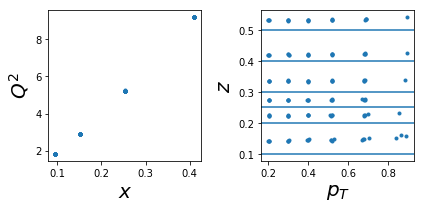

In [20]:
tab=pd.DataFrame(data['sidis']['tabs']['hermes']).query('idx==1000')
tab['xr']=[np.round(x,2) for x in tab.x]
ZR=[[0.1,0.2],[0.2,0.25],[0.25,0.3],[0.3,0.4],[0.4,0.5],[0.5,1]]

nrows,ncols=1,2
fig = py.figure(figsize=(ncols*3,nrows*3))
ax=py.subplot(nrows,ncols,1)
ax.plot(tab['x'],tab['Q2'],'.'); ax.set_xlabel(r'$x$',size=20); ax.set_ylabel(r'$Q^2$',size=20)
ax=py.subplot(nrows,ncols,2)
ax.plot(tab['pT'],tab['z'],'.'); ax.set_xlabel(r'$p_T$',size=20); ax.set_ylabel(r'$z$',size=20);
for zr in ZR: ax.axhline(y=zr[0]);
py.tight_layout()

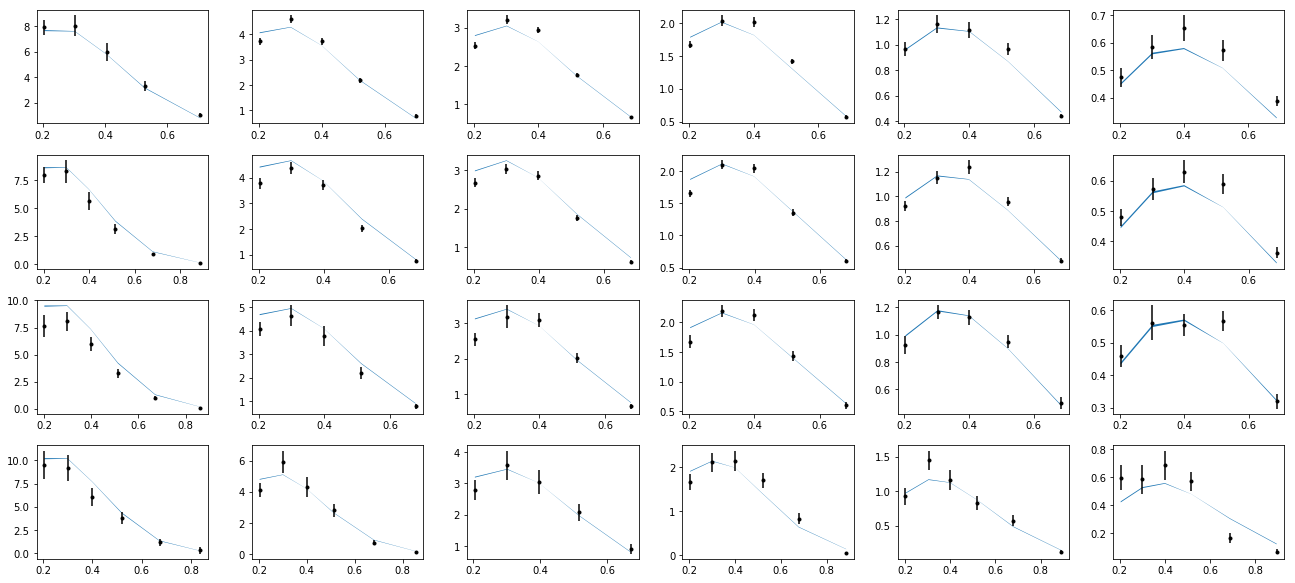

In [22]:
nrows,ncols=6,6
fig = py.figure(figsize=(ncols*3,nrows*2))
cnt=0
for xr in np.unique(tab['xr']):
    tabx=tab.query('xr==%f'%xr)
    for zr in ZR:
        tabz=tabx.query('z>%f and z<%f'%(zr[0],zr[1]))
        cnt+=1
        ax=py.subplot(nrows,ncols,cnt)
        ax.errorbar(tabz['pT'],tabz['exp'],yerr=tabz['alpha'],fmt='k.')
        ax.fill_between(tabz['pT'],tabz['thy']-tabz['dthy'],tabz['thy']+tabz['dthy'])
        
py.tight_layout()

### 1001

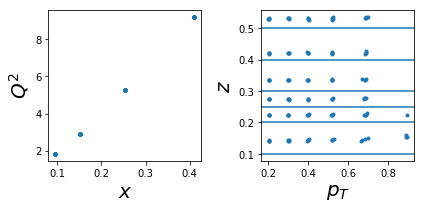

In [24]:
tab=pd.DataFrame(data['sidis']['tabs']['hermes']).query('idx==1001')
tab['xr']=[np.round(x,2) for x in tab.x]
ZR=[[0.1,0.2],[0.2,0.25],[0.25,0.3],[0.3,0.4],[0.4,0.5],[0.5,1]]

nrows,ncols=1,2
fig = py.figure(figsize=(ncols*3,nrows*3))
ax=py.subplot(nrows,ncols,1)
ax.plot(tab['x'],tab['Q2'],'.'); ax.set_xlabel(r'$x$',size=20); ax.set_ylabel(r'$Q^2$',size=20)
ax=py.subplot(nrows,ncols,2)
ax.plot(tab['pT'],tab['z'],'.'); ax.set_xlabel(r'$p_T$',size=20); ax.set_ylabel(r'$z$',size=20);
for zr in ZR: ax.axhline(y=zr[0]);
py.tight_layout()

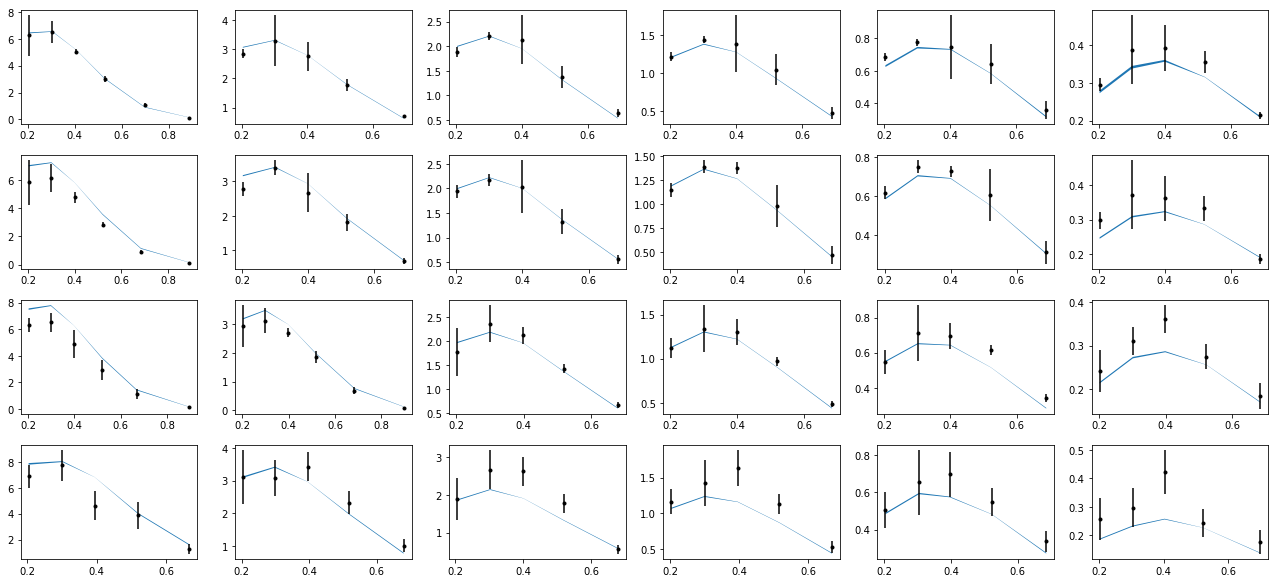

In [25]:
nrows,ncols=6,6
fig = py.figure(figsize=(ncols*3,nrows*2))
cnt=0
for xr in np.unique(tab['xr']):
    tabx=tab.query('xr==%f'%xr)
    for zr in ZR:
        tabz=tabx.query('z>%f and z<%f'%(zr[0],zr[1]))
        cnt+=1
        ax=py.subplot(nrows,ncols,cnt)
        ax.errorbar(tabz['pT'],tabz['exp'],yerr=tabz['alpha'],fmt='k.')
        ax.fill_between(tabz['pT'],tabz['thy']-tabz['dthy'],tabz['thy']+tabz['dthy'])
        
py.tight_layout()

### 1004

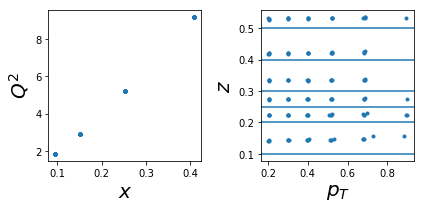

In [26]:
tab=pd.DataFrame(data['sidis']['tabs']['hermes']).query('idx==1004')
tab['xr']=[np.round(x,2) for x in tab.x]
ZR=[[0.1,0.2],[0.2,0.25],[0.25,0.3],[0.3,0.4],[0.4,0.5],[0.5,1]]

nrows,ncols=1,2
fig = py.figure(figsize=(ncols*3,nrows*3))
ax=py.subplot(nrows,ncols,1)
ax.plot(tab['x'],tab['Q2'],'.'); ax.set_xlabel(r'$x$',size=20); ax.set_ylabel(r'$Q^2$',size=20)
ax=py.subplot(nrows,ncols,2)
ax.plot(tab['pT'],tab['z'],'.'); ax.set_xlabel(r'$p_T$',size=20); ax.set_ylabel(r'$z$',size=20);
for zr in ZR: ax.axhline(y=zr[0]);
py.tight_layout()

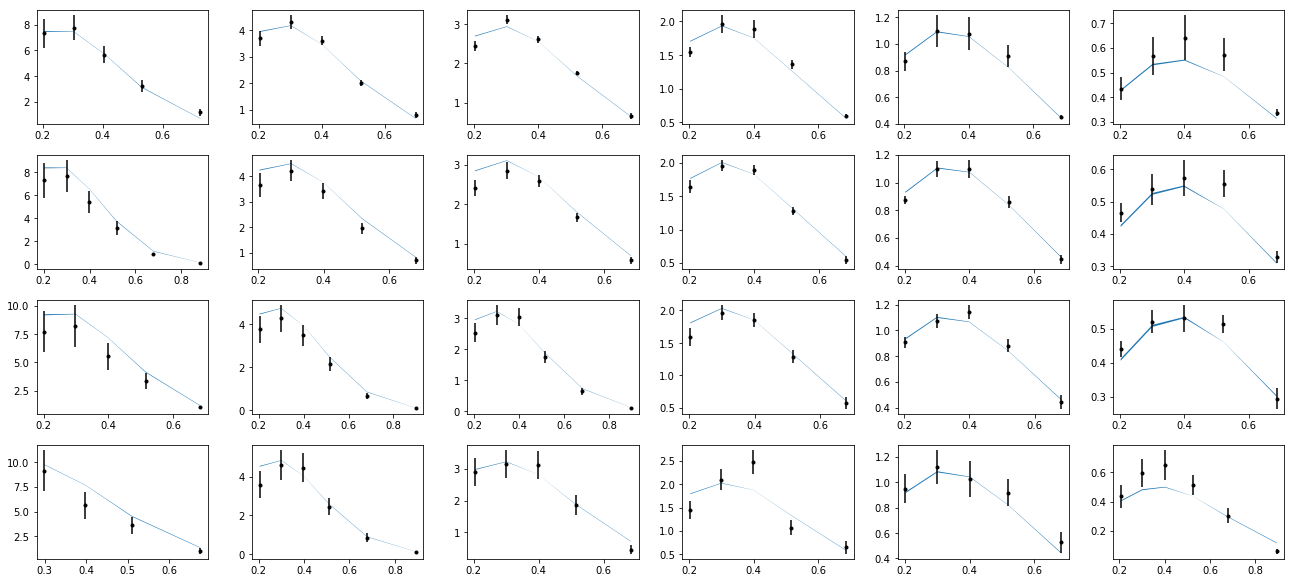

In [28]:
nrows,ncols=6,6
fig = py.figure(figsize=(ncols*3,nrows*2))
cnt=0
for xr in np.unique(tab['xr']):
    tabx=tab.query('xr==%f'%xr)
    for zr in ZR:
        tabz=tabx.query('z>%f and z<%f'%(zr[0],zr[1]))
        cnt+=1
        ax=py.subplot(nrows,ncols,cnt)
        ax.errorbar(tabz['pT'],tabz['exp'],yerr=tabz['alpha'],fmt='k.')
        ax.fill_between(tabz['pT'],tabz['thy']-tabz['dthy'],tabz['thy']+tabz['dthy'])
        
py.tight_layout()

### 1005

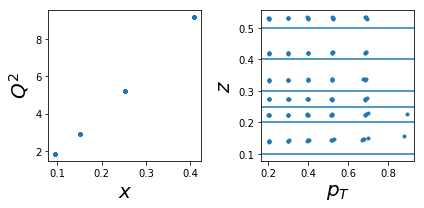

In [29]:
tab=pd.DataFrame(data['sidis']['tabs']['hermes']).query('idx==1005')
tab['xr']=[np.round(x,2) for x in tab.x]
ZR=[[0.1,0.2],[0.2,0.25],[0.25,0.3],[0.3,0.4],[0.4,0.5],[0.5,1]]

nrows,ncols=1,2
fig = py.figure(figsize=(ncols*3,nrows*3))
ax=py.subplot(nrows,ncols,1)
ax.plot(tab['x'],tab['Q2'],'.'); ax.set_xlabel(r'$x$',size=20); ax.set_ylabel(r'$Q^2$',size=20)
ax=py.subplot(nrows,ncols,2)
ax.plot(tab['pT'],tab['z'],'.'); ax.set_xlabel(r'$p_T$',size=20); ax.set_ylabel(r'$z$',size=20);
for zr in ZR: ax.axhline(y=zr[0]);
py.tight_layout()

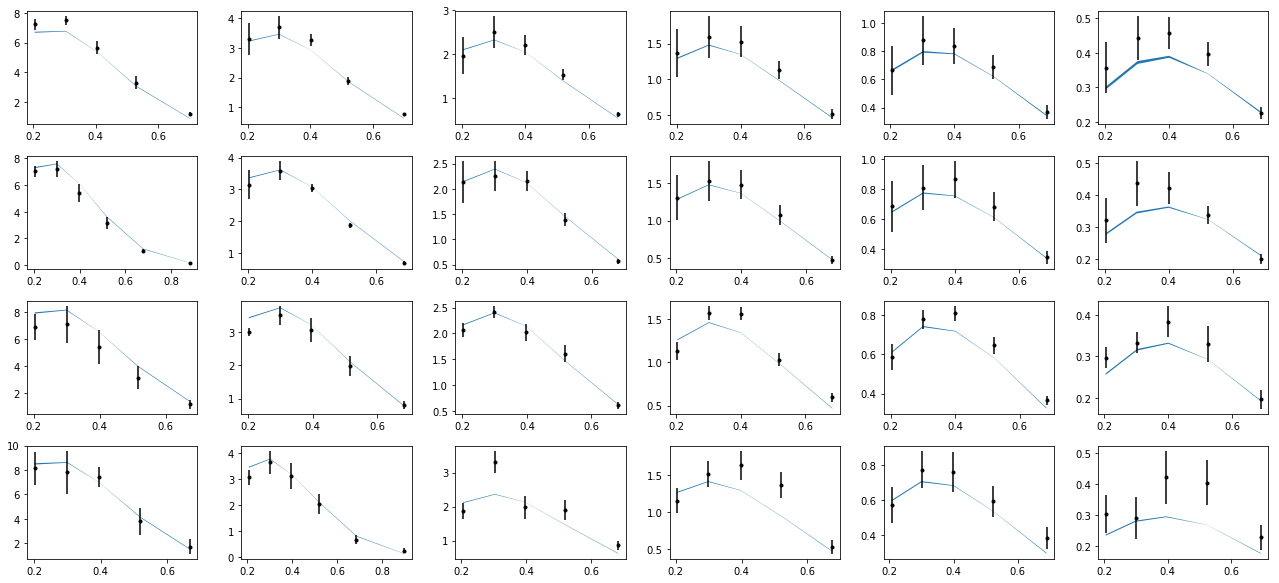

In [30]:
nrows,ncols=6,6
fig = py.figure(figsize=(ncols*3,nrows*2))
cnt=0
for xr in np.unique(tab['xr']):
    tabx=tab.query('xr==%f'%xr)
    for zr in ZR:
        tabz=tabx.query('z>%f and z<%f'%(zr[0],zr[1]))
        cnt+=1
        ax=py.subplot(nrows,ncols,cnt)
        ax.errorbar(tabz['pT'],tabz['exp'],yerr=tabz['alpha'],fmt='k.')
        ax.fill_between(tabz['pT'],tabz['thy']-tabz['dthy'],tabz['thy']+tabz['dthy'])
        
py.tight_layout()